In [1]:
from rdkit.Chem import PandasTools

In [2]:
SDFFile = "bace1547.sdf"
BRDLigs = PandasTools.LoadSDF(SDFFile)

,PARENT_CMPD_ID,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,COMPOUND_KEY,PUBMED_ID,JOURNAL,YEAR,VOLUME,...,Class,des_class_bayes,maacs_class_bayes,radial_class_bayes,dend_class_bayes,molprint_class_bayes,RF_canvas,DNN_canvas,ID,ROMol
0,3RSV,IC50,=,0.00069999998,uM,57,21707077,J.Med.Chem.,2011,54,...,1,1,0,1,1,1,1,1,3RSV_5836,
1,3R2F,IC50,=,0.0014,uM,28a,21782431,Bioorg.Med.Chem.Lett.,2011,21,...,1,1,1,1,1,1,1,1,3R2F_6916,
2,2WF1,IC50,=,0.0020000001,uM,9,19477642,Bioorg.Med.Chem.Lett.,2009,19,...,1,1,1,1,1,1,1,1,2WF1_3669,
3,4D89,IC50,=,0.0020000001,uM,60n,22380629,J.Med.Chem.,2012,55,...,1,1,1,1,1,1,1,1,4D89_3364,
4,2VNN,IC50,=,0.0020000001,uM,8a,18457381,J.Med.Chem.,2008,51,...,1,1,1,1,1,1,1,1,2VNN_3313,

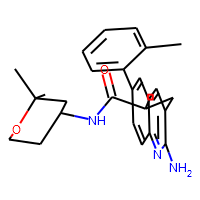
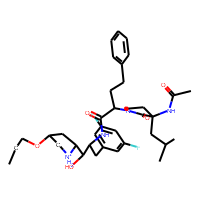
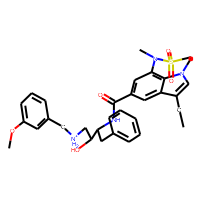
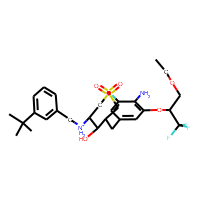
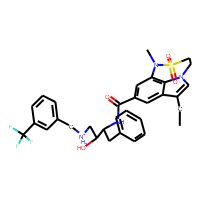

In [3]:
BRDLigs[0:5]

In [4]:
BRDLigs['PUBMED_ID'][0:5]

0    21707077
1    21782431
2    19477642
3    22380629
4    18457381
Name: PUBMED_ID, dtype: object

In [5]:
len(BRDLigs['PUBMED_ID'])

1547

### Assumption from the paper (https://pubs.acs.org/doi/10.1021/acs.jcim.6b00290), active are IC 50 <= 100 nM, other are inactive (page 17)

In [6]:
#import pubchempy as pcp

In [7]:
BRDLigs['STANDARD_UNITS'][0]

'uM'

In [8]:
BRDLigs['STANDARD_UNITS'].unique()

array(['uM', nan, 'nM'], dtype=object)

In [9]:
float(BRDLigs['STANDARD_VALUE'][0]) <1

True

In [10]:
BRDLigs['ACTIVITY'] = [dum for dum in range(len(BRDLigs['PUBMED_ID']))]

In [11]:
for i in range(len(BRDLigs['PUBMED_ID'])):
    if BRDLigs['STANDARD_UNITS'][i] == 'nM':
        if float(BRDLigs['STANDARD_VALUE'][i]) <= 100:
            BRDLigs['ACTIVITY'][i] = 1
        else:
            BRDLigs['ACTIVITY'][i] = 0
    elif BRDLigs['STANDARD_UNITS'][i] == 'uM':
        if (float(BRDLigs['STANDARD_VALUE'][i]))*1000 <= 100: #not divide, but multiply
            BRDLigs['ACTIVITY'][i] = 1
        else:
            BRDLigs['ACTIVITY'][i] = 0
    else:
        BRDLigs['ACTIVITY'][i] = 'ERROR'

<ipython-input-11-e48b06917648>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BRDLigs['ACTIVITY'][i] = 1
<ipython-input-11-e48b06917648>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BRDLigs['ACTIVITY'][i] = 0
<ipython-input-11-e48b06917648>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BRDLigs['ACTIVITY'][i] = 'ERROR'
C:\Users\aleks\anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 

In [12]:
BRDLigs['ACTIVITY']

0       1
1       1
2       1
3       1
4       1
       ..
1542    0
1543    0
1544    0
1545    0
1546    0
Name: ACTIVITY, Length: 1547, dtype: object

In [13]:
BRDLigs['ACTIVITY'].describe()

count     1547
unique       3
top          0
freq       841
Name: ACTIVITY, dtype: int64

In [14]:
errors = BRDLigs[BRDLigs['ACTIVITY'] == 'ERROR']

In [15]:
errors.shape

(39, 36)

### Import structures

In [16]:
import pandas as pd

In [17]:
data = pd.read_excel(r'bace1547_sin.xlsx')

In [18]:
data.head()

,Canonical_Smiles,PDB,Resolution,PARENT_CMPD_CHEMBLID,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,COMPOUND_KEY,PUBMED_ID,JOURNAL,YEAR,VOLUME,FIRST_PAGE,Company,idx,CID,pIC50,Class,Model
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,3RSV,2.50,NaN,IC50,=,0.0007,uM,57,21707077.0,J.Med.Chem.,2011.0,54.0,5836.0,Amgen,1,BACE_1,9.154901,1.0,Train
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,3R2F,2.53,NaN,IC50,=,0.0014,uM,28a,21782431.0,Bioorg.Med.Chem.Lett.,2011.0,21.0,6916.0,BMS,2,BACE_2,8.853872,1.0,Train
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,2WF1,1.60,NaN,IC50,=,0.0020,uM,9,19477642.0,Bioorg.Med.Chem.Lett.,2009.0,19.0,3669.0,GSK,3,BACE_3,8.698970,1.0,Train
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,4D89,1.65,NaN,IC50,=,0.0020,uM,60n,22380629.0,J.Med.Chem.,2012.0,55.0,3364.0,Novartis,4,BACE_4,8.698970,1.0,Train
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,2VNN,1.87,NaN,IC50,=,0.0020,uM,8a,18457381.0,J.Med.Chem.,2008.0,51.0,3313.0,GSK,5,BACE_5,8.698970,1.0,Train


In [19]:
len(data['Canonical_Smiles'])

1547

In [20]:
Canonical_Smiles = data['Canonical_Smiles']

In [21]:
Canonical_Smiles[0:5]

0    O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...
1    Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...
2    S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
3    S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...
4    S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
Name: Canonical_Smiles, dtype: object

In [22]:
BRDLigs['RELATION'][0:5]

0    =
1    =
2    =
3    =
4    =
Name: RELATION, dtype: object

In [23]:
print(pd.isna(BRDLigs.loc[0, 'RELATION']))

False


In [24]:
test_empty = []
for empty in range(len(BRDLigs)):
    test_empty.append(pd.isna(BRDLigs.loc[empty, 'RELATION']))

In [25]:
pd.DataFrame(data=test_empty, columns=['TEST']).describe() #so there are some empty values....

,TEST
count,1547
unique,2
top,False
freq,1530


## There are some missing values... Need to be handled.

In [26]:
to_be_saved = pd.DataFrame(Canonical_Smiles, columns=['Canonical_Smiles'])

In [27]:
to_be_saved.head()

,Canonical_Smiles
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...


In [28]:
to_be_saved['ACTIVITY'] = BRDLigs['ACTIVITY']

In [29]:
to_be_saved.head()

,Canonical_Smiles,ACTIVITY
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,1
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,1
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1


In [30]:
errors = to_be_saved[to_be_saved['ACTIVITY'] == 'ERROR']

In [31]:
errors.shape

(39, 2)

In [32]:
to_be_saved = to_be_saved[to_be_saved['ACTIVITY'] != 'ERROR']

In [33]:
to_be_saved.shape

(1508, 2)

In [34]:
to_be_saved = to_be_saved.rename(columns={'Canonical_Smiles': 'SMILES', 'ACTIVITY': 'target'})

In [35]:
to_be_saved.head()

,SMILES,target
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,1
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,1
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1


In [36]:
to_be_saved.to_csv('data_no_agg.csv')

## Data aggregation

In [37]:
import pandas as pd
import numpy as np

In [38]:
data_ = pd.read_csv('data_no_agg.csv')

In [39]:
data_.head()

,Unnamed: 0,SMILES,target
0,0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,1
1,1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,1
2,2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1
3,3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,1
4,4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1


In [40]:
data_['SMILES'].describe()

count                                                  1508
unique                                                 1492
top       Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...
freq                                                      2
Name: SMILES, dtype: object

In [41]:
data_grouped = data_.groupby('SMILES')

In [42]:
## Helping functions
def get_levels(x):
    y = x.dropna()
    if y.empty:
        return np.nan
    else:
        levs = list(set(y.tolist()))
        if len(levs) == 1:
            return levs[0]
        else:
            return 'mix'

def get_all_levels(x):
    y = x.dropna()
    if y.empty:
        return np.nan
    else:
        return sorted(list(set(y.tolist())))
                
def get_mean(x):
    y = x.dropna()
    if y.empty:
        return np.nan
    else:
        return np.mean(y)
    
def expand_activity(x):
    expanded = [None for iii in range(max_level_activity)]
    n_act = len(x)
    expanded[:n_act] = x[:n_act]
    return np.array(expanded)

In [43]:
aggFunctions = {
    'target': ['min', 'max', get_all_levels, get_mean],
    'SMILES': get_levels
}

In [44]:
data_aggregated = data_grouped.agg(aggFunctions)

In [45]:
max_level_activity = max(data_aggregated[("target", "get_all_levels")].apply(lambda x: len(x)))

In [46]:
data_aggregated.columns = [str(item[0])+"_"+str(item[1]) for item in data_aggregated.columns.to_flat_index().to_list()]

In [47]:
all_activities = data_aggregated[("target_get_all_levels")].apply(lambda x: expand_activity(x))
all_activities = pd.DataFrame(all_activities.to_list(), columns=["target_"+str(iii) for iii in range(max_level_activity)])
all_activities = all_activities.set_index(data_aggregated.index)

In [48]:
data_aggregated = pd.concat([data_aggregated, all_activities], axis=1)

In [49]:
data_aggregated

,target_min,target_max,target_get_all_levels,target_get_mean,SMILES_get_levels,target_0,target_1
SMILES,,,,,,,
Brc1cc(cc(F)c1N)C[C@@H]1CS(=O)(=O)C[C@H]([NH2+]Cc2cc(ccc2)C(C)(C)C)[C@H]1O,1,1,[1],1.0,Brc1cc(cc(F)c1N)C[C@@H]1CS(=O)(=O)C[C@H]([NH2+...,1,NaN
Brc1cc(cc(F)c1N)C[C@@H]1CS(=O)(=O)C[C@H]([NH2+]Cc2cc(ccc2)C(F)(F)C)[C@H]1O,0,0,[0],0.0,Brc1cc(cc(F)c1N)C[C@@H]1CS(=O)(=O)C[C@H]([NH2+...,0,NaN
Brc1cc(cc(c1)C(C)(C)C)C1([NH2+]C[C@@H](O)[C@@H](NC(=O)C)Cc2cc(F)cc(F)c2)CCCCC1,0,0,[0],0.0,Brc1cc(cc(c1)C(C)(C)C)C1([NH2+]C[C@@H](O)[C@@H...,0,NaN
Brc1cc(ccc1)C(=O)Nc1ccc(cc1)-c1n(CC(=O)NC(=[NH2+])N)c(cc1)-c1ccccc1,0,0,[0],0.0,Brc1cc(ccc1)C(=O)Nc1ccc(cc1)-c1n(CC(=O)NC(=[NH...,0,NaN
Brc1cc(ccc1)CCC=1N=C(N)N(C)C(=O)C=1,0,0,[0],0.0,Brc1cc(ccc1)CCC=1N=C(N)N(C)C(=O)C=1,0,NaN
...,...,...,...,...,...,...,...
s1ccnc1N1S(=O)(=O)N([C@]2(C[C@@H]([N@H+](CC2)Cc2cc(OC(C)C)ccc2)C)C1)c1cc(F)ccc1,0,0,[0],0.0,s1ccnc1N1S(=O)(=O)N([C@]2(C[C@@H]([N@H+](CC2)C...,0,NaN
s1ccnc1NC1CCC([NH2+]C[C@@H](O)[C@@H](NC(=O)C)Cc2cc(F)cc(F)c2)(CC1)c1cc(ccc1)C(C)(C)C,1,1,[1],1.0,s1ccnc1NC1CCC([NH2+]C[C@@H](O)[C@@H](NC(=O)C)C...,1,NaN
s1cncc1-c1cc(ccc1)C[C@H](NC(=O)COC)[C@H](O)C[NH2+][C@H]1CC2(Oc3ncc(cc13)CC(C)(C)C)CCC2,1,1,[1],1.0,s1cncc1-c1cc(ccc1)C[C@H](NC(=O)COC)[C@H](O)C[N...,1,NaN


In [50]:
data_aggregated.columns.to_list()

['target_min',
 'target_max',
 'target_get_all_levels',
 'target_get_mean',
 'SMILES_get_levels',
 'target_0',
 'target_1']

In [51]:
to_be_saved_ = data_aggregated.columns.to_list()[5:]

In [52]:
to_save = data_aggregated[to_be_saved_]

In [53]:
to_save.reset_index()

,SMILES,target_0,target_1
0,Brc1cc(cc(F)c1N)C[C@@H]1CS(=O)(=O)C[C@H]([NH2+...,1,NaN
1,Brc1cc(cc(F)c1N)C[C@@H]1CS(=O)(=O)C[C@H]([NH2+...,0,NaN
2,Brc1cc(cc(c1)C(C)(C)C)C1([NH2+]C[C@@H](O)[C@@H...,0,NaN
3,Brc1cc(ccc1)C(=O)Nc1ccc(cc1)-c1n(CC(=O)NC(=[NH...,0,NaN
4,Brc1cc(ccc1)CCC=1N=C(N)N(C)C(=O)C=1,0,NaN
...,...,...,...
1487,s1ccnc1N1S(=O)(=O)N([C@]2(C[C@@H]([N@H+](CC2)C...,0,NaN
1488,s1ccnc1NC1CCC([NH2+]C[C@@H](O)[C@@H](NC(=O)C)C...,1,NaN
1489,s1cncc1-c1cc(ccc1)C[C@H](NC(=O)COC)[C@H](O)C[N...,1,NaN
1490,s1cncc1CNC(=O)[C@@H](Cc1cc2cc(ccc2nc1N)-c1cccc...,1,NaN


In [54]:
to_save.to_csv('data.csv')